In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x=pd.read_csv("weightedX.csv")
y=pd.read_csv("weightedY.csv")

x=x.values
y=y.values
u=x.mean()
std=x.std()
x=(x-u)/std

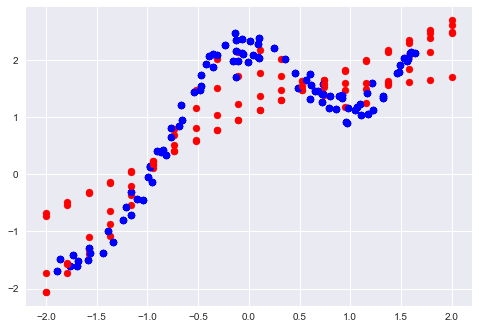

In [51]:
def getw(q,x,t):
    m=x.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        w[i,i]=np.exp(np.dot((x[i]-q),(x[i]-q).T)/(-2*t*t))
    return w

x=np.mat(x)
y=np.mat(y)
m=x.shape[0]
w=getw(-1,x,-1)
w.shape

def predict(x,y,q,t):
    m=x.shape[0]
    ones=np.ones((m,1))
    x_=np.hstack((x,ones))
    qx=np.mat([q,1])
    w=getw(qx,x_,t)
    theta=np.linalg.pinv(x_.T*(w*x_))*(x_.T*(w*y))
    pred=np.dot(qx,theta)
    return theta,pred

theta,pred=predict(x,y,1.0,1.0)
theta,pred
    
def plotpred(t):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    for a in x_test:
        theta,pred=predict(x,y,a,t)
        y_test.append(pred[0][0])
    y_test=np.array(y_test)
    xo=np.array(x)
    yo=np.array(y)
    plt.style.use("seaborn")
    plt.scatter(xo,yo,color='blue')
    plt.scatter(x_test,y_test,color='red')
    
t=[10,0.1,5,.5,1]
for i in t:
    plotpred(i)